In [39]:
import numpy as np
import pandas as pd
import os
from PIL import Image
import pywt
import matplotlib.pyplot as plt
%matplotlib inline

import cv2
import glob 
import random
#import os


In [2]:
img_name  = 'DSC00315'

In [3]:
data_img = np.asarray(Image.open(f"data/{img_name}.jpg"))
r = data_img[:,:,0]
g = data_img[:,:,1]
b = data_img[:,:,2]
    
coeff_r = pywt.dwt2(r, 'bior1.3')
coeff_g = pywt.dwt2(g, 'bior1.3')
coeff_b = pywt.dwt2(b, 'bior1.3')
    
LL_r, (LH_r, HL_r, HH_r) = coeff_r
LL_g, (LH_g, HL_g, HH_g) = coeff_g
LL_b, (LH_b, HL_b, HH_b) = coeff_b

In [31]:
try_size=Image.open(f"data/{img_name}.jpg")
try_size.size #works
pix=try_size.load()


(139, 147, 166)

In [4]:
#function for deleting half of the pictures randomly (or every pixel mit w.s. 0.5%?)

In [8]:
shape=data_img.shape
number_of_pix=shape[0]*shape[1]
number_of_val=number_of_pix*3

In [37]:
def delete_pixel(img_data):
    counter=0
    for i in range(img_data.shape[0]):
        for j in range(img_data.shape[1]):
            counter+=1
            if counter%2==0:
                #img_data[i,j]=0
                img_data.putpixel((i,j),0)#[i,j]=0
    return img_data

In [36]:
delete_pixel(data_img)

AttributeError: 'numpy.ndarray' object has no attribute 'putpixel'

In [ ]:
#google how to delete a pixel,
#how to noise an image

In [ ]:

#'numpy.ndarray' object has no attribute 'putpixel'

In [40]:
len(data_img.shape)

3

In [42]:
mean = 0 #?
var = 10 #?
sigma = var ** 0.5 #?
gaussian = np.random.normal(mean, sigma, (data_img.shape[0], data_img.shape[1])) 

#ist dann auf jedem pixel noise?!

noisy_image = np.zeros(data_img.shape, np.float32)

if len(data_img.shape) == 2:
    noisy_image = data_img + gaussian
else:
    #noisy_image[:, :, 0] = data_img[:, :, 0] + gaussian
    #noisy_image[:, :, 1] = data_img[:, :, 1] + gaussian
    #noisy_image[:, :, 2] = data_img[:, :, 2] + gaussian
    noisy_image=data_img+gaussian #adding gausian to each channel

        #cv2.normalize(noisy_image, noisy_image, 0, 255, cv2.NORM_MINMAX, dtype=-1)
        
        
        
noisy_image = noisy_image.astype(np.uint8)

      # cv2.imshow("img", img)
       #cv2.imshow("gaussian", gaussian)
       #cv2.imshow("noisy", noisy_image)
#cv2.waitKey(0)

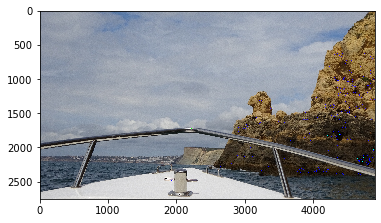

In [47]:
plt.imshow(noisy_image);
#why blue?
#will work?
#meaning is new pict than closer to noisy_image or to data_img (computationally)

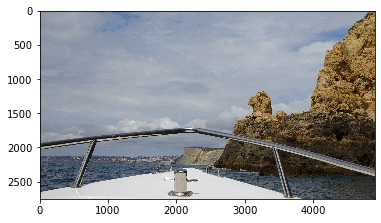

In [48]:
plt.imshow(data_img);

In [ ]:
#wrap them all in a function!!!!!

## Adding Salt & Pepper Noise

Input: Image, Probability of the noise

In [49]:
#import numpy as np

#import cv2

def saltpepper_noise(image,prob):
    
    output = np.zeros(image.shape,np.uint8)
    threshold = 1 - prob 
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            rdn = random.random()
            if rdn < prob:
                output[i][j] = 0 #generate gaussian or add (+-) #how distributed?! #statt prob noch amount?
            elif rdn > threshold:
                output[i][j] = 255
            else:
                output[i][j] = image[i][j]
    return output

#image = cv2.imread('image.jpg',0) # Only for grayscale image
#noise_img = sp_noise(image,0.05)
#cv2.imwrite('sp_noise.jpg', noise_img)

In [83]:
def gaussian_noise(image,prob):
    my, sigma = 0, 2 # mean and standard deviation
    
    output = np.zeros(image.shape,np.uint8)
    threshold = 1 - prob 
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            rdn = random.random()
            if rdn < prob: #my sigma accordingly s th sth happens, noise mit zero besser, instead of gaussian, cause 0 IS 0?
                output[i][j] =image[i][j] + np.random.normal(my, sigma, (data_img.shape[]))#np.random.normal(my, sigma, 1)# image[i][j] + np.random.normal(my, sigma, 1)#+- zufällig und my sigma wie? mit if davor
            elif rdn > threshold:
                output[i][j] = np.random.normal(my, sigma, 1)# image[i][j] + np.random.normal(my, sigma, 1)
            else:
                output[i][j] = image[i][j]
    return output

#outcome : grizzly bären m wald, aber 0.7 ist auch hoch

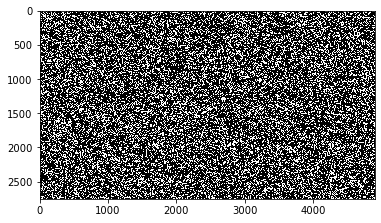

In [84]:
plt.imshow(gaussian_noise(data_img,0.7));

In [91]:
def gaussian_noise(image,prob):
    my, sigma = 0, 2 # mean and standard deviation
   
    
    output = np.zeros(image.shape,np.uint8)
    threshold = 1 - prob 
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            rdn = random.random()
            if rdn < prob: #my sigma accordingly s th sth happens, noise mit zero besser, instead of gaussian, cause 0 IS 0?
                output[i][j] =image[i][j] + np.random.normal(my, sigma,1)# (data_img.shape[0], data_img.shape[1],data_img.shape[2]))#np.random.normal(my, sigma, 1)# image[i][j] + np.random.normal(my, sigma, 1)#+- zufällig und my sigma wie? mit if davor
            elif rdn > threshold:
                output[i][j] = image[i][j] + np.random.normal(my, sigma, 1)#(data_img.shape[0], data_img.shape[1],data_img.shape[2]))#np.random.normal(my, sigma, 1)# image[i][j] + np.random.normal(my, sigma, 1)
            else:
                output[i][j] = image[i][j]
    return output
#touple in 3rd entry of normal
#which one is correct, think und see below

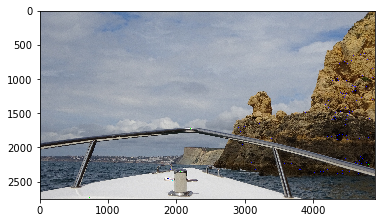

In [94]:
plt.imshow(gaussian_noise(data_img,0.4)) #es IST was da!
#stat prob 0.4 noch tatel amount 40 % aller.

In [96]:
#row,col,ch= image.shape

def gaussian_noise(image,prob):
    my, sigma = 0, 2 # mean and standard deviation
    row,col,ch= image.shape
    
    output = np.zeros(image.shape,np.uint8)
    threshold = 1 - prob 
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            rdn = random.random()
            if rdn < prob: #my sigma accordingly s th sth happens, noise mit zero besser, instead of gaussian, cause 0 IS 0?
                output[i][j] =image[i][j] + np.random.normal(my, sigma,(row,col,ch))#(image.shape))# (data_img.shape[0], data_img.shape[1],data_img.shape[2]))#np.random.normal(my, sigma, 1)# image[i][j] + np.random.normal(my, sigma, 1)#+- zufällig und my sigma wie? mit if davor
            elif rdn > threshold:
                output[i][j] = image[i][j] + np.random.normal(my, sigma,(row,col,ch))# (image.shape))#(data_img.shape[0], data_img.shape[1],data_img.shape[2]))#np.random.normal(my, sigma, 1)# image[i][j] + np.random.normal(my, sigma, 1)
            else:
                output[i][j] = image[i][j]
    return output

In [97]:
plt.imshow(gaussian_noise(data_img,0.4))

ValueError: could not broadcast input array from shape (2752,4896,3) into shape (3)

In [98]:
def poisson_noise(image,prob): 
    vals = len(np.unique(image))
    val = 2 ** np.ceil(np.log2(vals))
    output = np.zeros(image.shape,np.uint8)
    threshold = 1 - prob 
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            rdn = random.random()
            if rdn < prob:
                output[i][j] = np.random.poisson(image * vals) / float(vals) 
            elif rdn > threshold:
                output[i][j] = image[i][j] #?
            else:
                output[i][j] = image[i][j]
    return output

In [99]:
plt.imshow(poisson_noise(data_img, 0.2))

ValueError: could not broadcast input array from shape (2752,4896,3) into shape (3)

In [103]:
def speckle_noise(image,prob):
    output = np.zeros(image.shape,np.uint8)
    threshold = 1 - prob 
    row,col,ch = image.shape
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            rdn = random.random()
            if rdn < prob:
                gauss = np.random.randn(row,col,ch).reshape(row,col,ch)
                #gauss
                output[i][j] = image[i][j]+image[i][j]*gauss#np.random.poisson(image * vals) / float(vals) 
            #elif rdn > threshold:
             #   output[i][j] = image[i][j] #?
            else:
                output[i][j] = image[i][j]
    return output

In [104]:
plt.imshow(speckle_noise(data_img,0.2))

ValueError: could not broadcast input array from shape (2752,4896,3) into shape (3)

In [ ]:
#Do others analogouesly

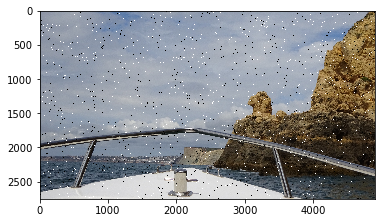

In [105]:
plt.imshow(saltpepper_noise(data_img,0.01));

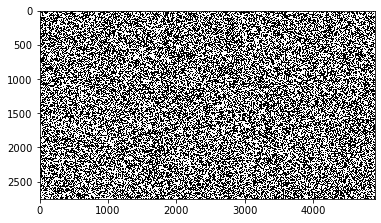

In [58]:
plt.imshow(saltpepper_noise(data_img,0.5));

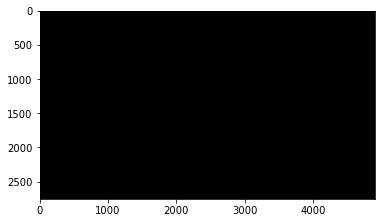

In [107]:
plt.imshow(saltpepper_noise(data_img,1)); #why no salt?

In [54]:
#more different noise types and reconstruct?

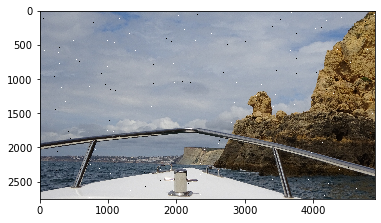

In [55]:
plt.imshow(saltpepper_noise(data_img,0.001));

noise_type <br/>

    `gauss`     Gaussian-distributed additive noise.
    `poisson`   Poisson-distributed noise generated from the data.
    `s&p`       Replaces random pixels with 0 or 1.
    `speckle`   Multiplicative noise using out = image + n*image,where
                n is uniform noise with specified mean & variance.

image: ndarray (will be convertet to `float`) <br/>


In [ ]:
#add other noises as above maybe?

In [65]:
def noisy(noise_type,image):
    if noise_type == "gauss":
        row,col,ch= image.shape
        mean = 0
        var = 0.1
        sigma = var**0.5
        gauss = np.random.normal(mean,sigma,(row,col,ch))
        gauss = gauss.reshape(row,col,ch)
        noisy = image + gauss
        return noisy
    elif noise_type == "s&p":
        row,col,ch = image.shape
        s_vs_p = 0.5
        amount = 0.004
        out = np.copy(image)
# Salt mode
        num_salt = np.ceil(amount * image.size * s_vs_p)
        coords = [np.random.randint(0, i - 1, int(num_salt))
        for i in image.shape]
        out[coords] = 255

# Pepper mode
        num_pepper = np.ceil(amount* image.size * (1. - s_vs_p))
        coords = [np.random.randint(0, i - 1, int(num_pepper))
        for i in image.shape]
        out[coords] = 0
        return out
    elif noise_type == "poisson":
        vals = len(np.unique(image))
        vals = 2 ** np.ceil(np.log2(vals))
        noisy = np.random.poisson(image * vals) / float(vals)
        return noisy
    elif noise_type =="speckle":
        row,col,ch = image.shape
        gauss = np.random.randn(row,col,ch)
        gauss = gauss.reshape(row,col,ch)        
        noisy = image + image * gauss
        return noisy

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


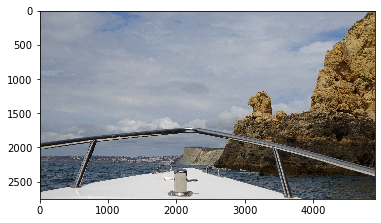

In [75]:
plt.imshow(noisy('poisson',data_img).astype(int)); #kein astype int ist schlecht(er)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


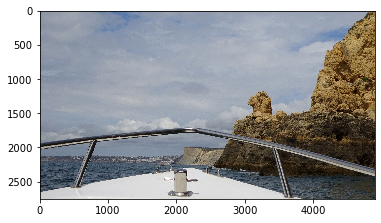

In [71]:
plt.imshow(noisy('gauss',data_img).astype(int)); #vor astype int war es nicht gut

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


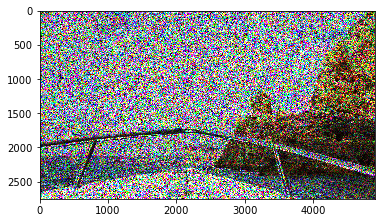

In [72]:
plt.imshow(noisy('speckle',data_img).astype(int)); #sehr krass aber vor (we can try) #aber vor astype int gint es nuö

C:\Users\zaruc\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:20: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
C:\Users\zaruc\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:26: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


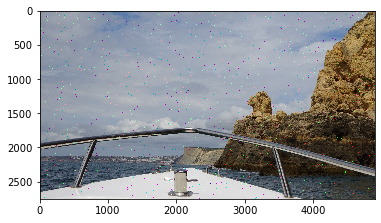

In [66]:
plt.imshow(noisy('s&p', data_img));#?!
#C:\Users\zaruc\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:20: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
#C:\Users\zaruc\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:26: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.

In [ ]:
#noise denoise comp rate